# Автор: Богданов Данила


### Скачивание файла и импорт библиотек

In [ ]:
!curl -L -o ./student-depression-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/adilshamim8/student-depression-dataset

!unzip student-depression-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  456k  100  456k    0     0  1068k      0 --:--:-- --:--:-- --:--:-- 1068k
Archive:  student-depression-dataset.zip
replace student_depression_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

from collections import Counter

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from IPython.display import display, HTML

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

## Фильтрация данных

In [ ]:
df_unfiltered = pd.read_csv("student_depression_dataset.csv")

In [ ]:
df_unfiltered.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### Удаление неинформативных столбцов

В датасете присутствуют столбцы, которые на 99% состоят из одного значения. Для проведения анализа они бесполезны, так как не предоставляют никакой вариативности, поэтому будут удалены.

In [ ]:
garbage_columns = []

print('"Мусорные" колонки:','\n')
for col in df_unfiltered.columns:
  counter = Counter(df_unfiltered[col])
  vals = list(counter.values())

  if np.max(vals) / np.sum(vals) > 0.99:
    garbage_columns.append(col)
    print('\t', col)

"Мусорные" колонки: 

	 Profession
	 Work Pressure
	 Job Satisfaction


Убедимся в этом визуально.

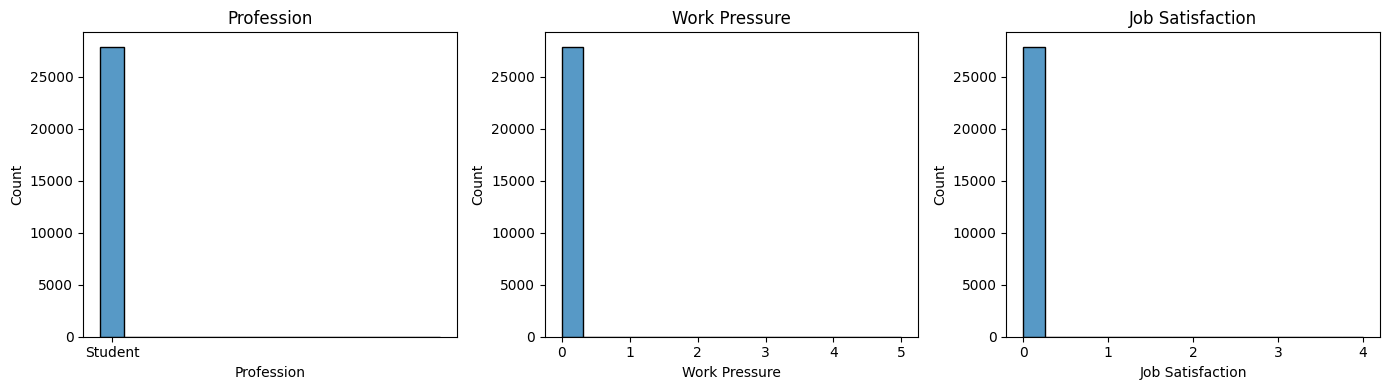

In [ ]:
f, axes = plt.subplots(1, 3 , figsize=(14, 4))

for col, ax in zip(garbage_columns, axes.flat):
  plot = sns.histplot(df_unfiltered[col], ax=ax)
  ax.set_title(f"{col}")

'''
уберем лишние названия столбцов на первой гистограмме,
т.к. они занимают много лишнего места и фактически ничего не подписывают
'''
ax1 = axes[0]
ax1.set_xticks([0])


plt.tight_layout() #масштабирование под заданный размер
plt.show()

In [ ]:
df_filtered = df_unfiltered.drop(garbage_columns, axis=1)

In [ ]:
df_filtered.head()

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


В датафрейме также присутствует еще один столбец, не дающий четкой информации.

In [ ]:
np.unique(df_unfiltered['City'])

array(["'Less Delhi'", "'Less than 5 Kalyan'", '3.0', 'Agra', 'Ahmedabad',
       'Bangalore', 'Bhavna', 'Bhopal', 'Chennai', 'City', 'Delhi',
       'Faridabad', 'Gaurav', 'Ghaziabad', 'Harsh', 'Harsha', 'Hyderabad',
       'Indore', 'Jaipur', 'Kalyan', 'Kanpur', 'Khaziabad', 'Kibara',
       'Kolkata', 'Lucknow', 'Ludhiana', 'M.Com', 'M.Tech', 'ME',
       'Meerut', 'Mihir', 'Mira', 'Mumbai', 'Nagpur', 'Nalini', 'Nalyan',
       'Nandini', 'Nashik', 'Patna', 'Pune', 'Rajkot', 'Rashi', 'Reyansh',
       'Saanvi', 'Srinagar', 'Surat', 'Thane', 'Vaanya', 'Vadodara',
       'Varanasi', 'Vasai-Virar', 'Visakhapatnam'], dtype=object)

Помимо перечня городов Индии, которые могли бы быть полезны для представления более общей картины об опрошенных студентов, этот столбец содержит в себе числа, названия образовательных программ из колонки 'Degree', имена и прочие захламляющие элементы, не относящиеся к категории колонки.

In [ ]:
df_filtered.drop('City', axis=1, inplace=True)

### Стандартизация и приведение к более удобному виду

1. Переобозначение колонок:

In [ ]:
df_filtered = df_filtered.rename(columns={'Have you ever had suicidal thoughts ?': 'suicidal_thoughts',
                                              'Family History of Mental Illness': 'family_history',
                                              'Work/Study Hours': 'study_hours'})

for column in df_filtered.columns:
  df_filtered = df_filtered.rename(columns={column: column.lower().replace(' ', '_')})

In [ ]:
df_filtered.columns

Index(['id', 'gender', 'age', 'academic_pressure', 'cgpa',
       'study_satisfaction', 'sleep_duration', 'dietary_habits', 'degree',
       'suicidal_thoughts', 'study_hours', 'financial_stress',
       'family_history', 'depression'],
      dtype='object')

2. Преобразование всех значений колонок с 'Yes' и 'No' на 1 и 0 соответственно.

In [ ]:
for column in ['suicidal_thoughts', 'family_history']:
  df_filtered.loc[df_filtered[column] == 'Yes', column] = 1
  df_filtered.loc[df_filtered[column] == 'No', column] = 0

3. Столбец 'degree' содержит названия программ. Для дальнейшей обработки будет полезно использовать не сами названия образовательных программ, а только степень обучения, на которой находятся соответствующие студенты.

In [ ]:
degree_names = np.unique(df_filtered['degree'])

degree_level_dict = {'school': set(["'Class 12'"]),
                     'bachelors': set(['LLB']),
                     'masters':set(['LLM']),
                     'phd':set(['PhD']),
                     'others':set(['Others'])}


#по первой букве можно легко отличить магистратуру от бакалавриата
#(LLB и LLM (Bachelor/Master of Laws), не поддающиеся этой логике, были уже внесены в частном порядке)
for name in np.unique(df_filtered['degree']):
  if name[0].lower() == 'b':
    degree_level_dict['bachelors'].add(name)

  elif name[0].lower() == 'm':
    degree_level_dict['masters'].add(name)



#вывод полученных групп
degree_level_list = [list(val) for val in degree_level_dict.values()]

max_len = 1
for elem in degree_level_list:
  if len(elem) > max_len:
    max_len = len(elem)

for i in range(len(degree_level_list)):
  k = max_len - len(degree_level_list[i])
  degree_level_list[i].extend(['']*k)


degree_level_df = pd.DataFrame({name: sorted(col)[::-1] for name, col in zip(list(degree_level_dict.keys()), degree_level_list)})
degree_level_df

,school,bachelors,masters,phd,others
0,'Class 12',LLB,MSc,PhD,Others
1,,BSc,MHM,,
2,,BHM,ME,,
3,,BE,MD,,
4,,BCA,MCA,,
5,,BBA,MBBS,,
6,,BA,MBA,,
7,,B.Tech,MA,,
8,,B.Pharm,M.Tech,,
9,,B.Ed,M.Pharm,,


Создадим в основном датафрейме колонку degree_level.

In [ ]:
df_filtered['degree_level'] = pd.Series([None] * len(df_filtered), dtype="str")


for key in degree_level_dict.keys():
  df_filtered.loc[df_filtered['degree'].isin(degree_level_dict[key]),'degree_level'] = key

# удалим уже ненужный столбец с названиями образовательных программ
df_filtered.drop('degree', axis=1, inplace=True)

In [ ]:
df_filtered.head()

,id,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,suicidal_thoughts,study_hours,financial_stress,family_history,depression,degree_level
0,2,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,1,3.0,1.0,0,1,bachelors
1,8,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,0,3.0,2.0,1,0,bachelors
2,26,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,0,9.0,1.0,1,0,bachelors
3,30,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,1,4.0,5.0,1,1,bachelors
4,32,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,1,1.0,1.0,0,0,masters


## Общая статистика

Выведем основную визуальную информацию для большего понимания, что представляет из себя группа опрошенных студентов.

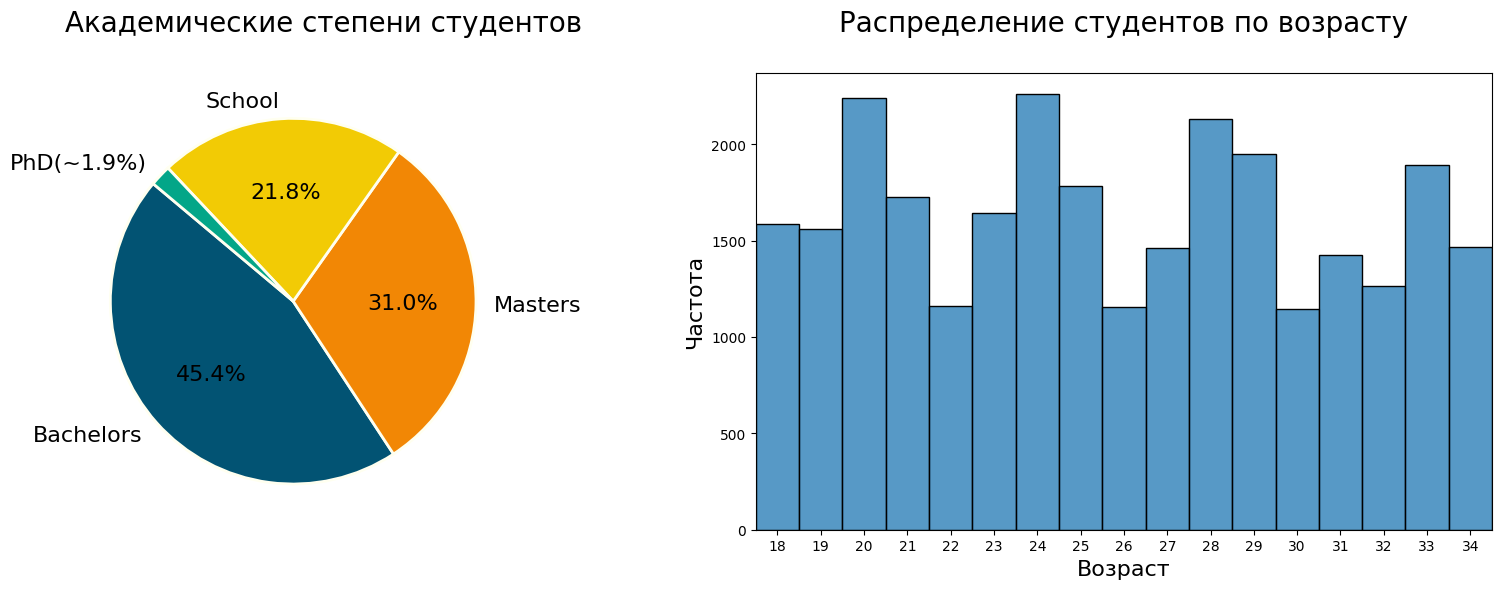

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = np.array(['#025373', '#F28705', '#F2CB05',   '#03A688'])
colors
counter_degree = Counter(df_filtered['degree_level'])
del counter_degree['others']

sizes = np.array(list(counter_degree.values()))
sort_ind = sizes.argsort()[::-1]
label = np.array(list(counter_degree.keys()))

def func(pct):
    return '{:.1f}%'.format(pct) if pct > 5 else ''

ax1 = axes.flat[0]
ax1.pie(sizes[sort_ind],
        labels=['Bachelors', 'Masters', 'School', f'PhD(~{np.min(sizes[sort_ind]) *100/np.sum(sizes) :.1f}%)'],
        colors=colors, autopct=lambda x: '{:.1f}%'.format(x) if x > 5 else '', # не будем выводить проценты для маленьких сегментов, чтобы не нагромождать картину
        startangle=140,
        textprops={'fontsize': 16},  wedgeprops={'edgecolor': 'ivory', 'linewidth': 2})

ax1.set_title('Академические степени студентов', fontsize=20, loc='left', pad=30)



'''
Отфильтруем колонку age, чтобы не портить гистограмму выбросами.
Зададим порог 35 лет, так как частоты для больших возрастов порядка единиц.
'''
age_values = df_filtered.age[df_filtered.age < 35]
ax2 = axes.flat[1]
hist = sns.histplot(age_values, discrete=True, ax=ax2)
ax2.set_xticks(np.arange(np.min(age_values), np.max(age_values)+1))
ax2.set_xlim(np.min(age_values)-0.5, np.max(age_values)+0.5)
ax2.set_title('Распределение студентов по возрасту',
              fontsize=20, loc='center', pad=30)
ax2.set_xlabel('Возраст' , fontsize=16)
ax2.set_ylabel('Частота' , fontsize=16)




plt.tight_layout()
plt.show()
display(HTML(f"<p style='font-size: 30px; color: black;'>{f'Соотношение полов среди учащихся: мужчины - {male_perc:.1f}%, женщины - {female_perc:.1f}%'}</p>"))
display(HTML(f"<p style='font-size: 30px; color: black;'>{f'Количество студентов с депрессией - {(df_filtered.depression == 1).sum() * 100 / (df_filtered.depression).shape[0]:.1f}%'}</p>"))

Распределение по возрасту имеет четыре выраженных пика. Можно проверить соотносятся ли они с уровнем образования.

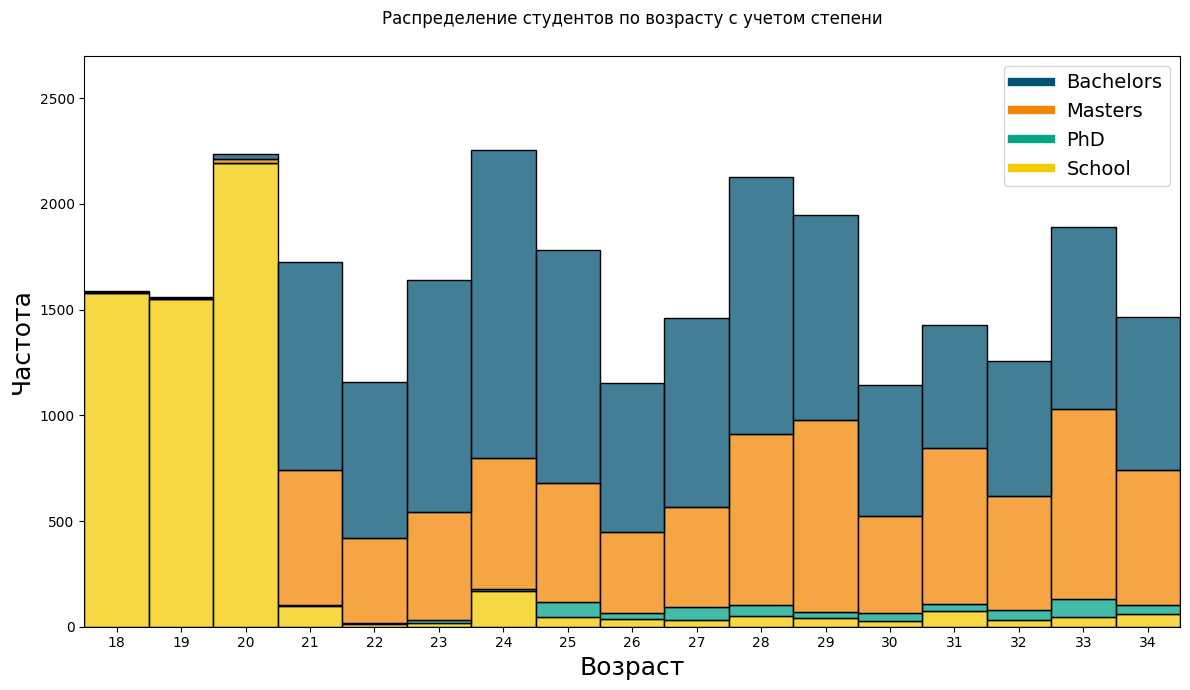

In [ ]:
plt.figure(figsize=(12, 7))

palette = sns.color_palette(['#025373', '#F28705',  '#03A688','#F2CB05'])

sns.histplot(df_filtered[(df_filtered.age < 35)&(df_filtered.degree_level != 'others')], x='age', hue='degree_level',
             discrete=True, multiple='stack', palette=palette, legend=False)
plt.title('Распределение студентов по возрасту с учетом степени', pad=23)
plt.xticks(np.arange(np.min(age_values), np.max(age_values)+1))
plt.xlim(np.min(age_values)-0.5, np.max(age_values)+0.5)
plt.ylim(0, 2700)
plt.xlabel('Возраст', fontsize=18)
plt.ylabel('Частота', fontsize=18)

handles = [plt.Line2D([0], [0], color=palette[i], lw=6) for i in range(len(palette))]
labels = ['Bachelors', 'Masters', 'PhD', 'School']  # Это метки для категорий

plt.legend(handles=handles, labels=labels, title="", fontsize=14,)


plt.tight_layout()
plt.show()


Действительно видно, что подавляющее количество студентов от 18 до 20 лет являются учениками 12 класса. Можно бы ожидать, что выраженные пики будут и для остальных групп. Однако распределения для бакалавров, магистров и phd так и остались неоднородными. Это может быть связано со многими факторами, объясняющие, почему возраст поступления в университет так разнится. Из таких можно выделить, например, разную длительность бакалавриата в Индии (от 3 до 5 лет) или получение повторного образования.

## Статистические тесты

### Тесты на независимость для бинарных переменных

Проверим на независимость следующие пары переменных:
* наличие депрессии и присутствие суицидальных мыслей
* наличие депрессии и история болезни в семье
* наличие депрессии и пол

В качестве нулевой гипотезы $H_{0}$ выдвинем предположение, что переменные **независимы**❌, тогда как гипотеза $H_{1}$ будет предполагать, что **зависимость**✅ переменных между собой.

Для проверки независимости на такой большой выбоке подойдет $\chi ^2$-тест.

Построим соответствующие таблицы сопряженности.

In [ ]:
depression_x_suicidal_thoughts = pd.crosstab(df_filtered.depression, df_filtered.suicidal_thoughts)
depression_x_family_history = pd.crosstab(df_filtered.depression, df_filtered.family_history)
depression_x_gender = pd.crosstab(df_filtered.depression, df_filtered.gender)

In [ ]:
depression_x_suicidal_thoughts

suicidal_thoughts,0,1
depression,,
0,7866,3699
1,2379,13957


Низкое значение p-value показывает, что в условиях нулевой гипотезы получить такое же или более экстремальное значение статистики маловероятно. Высокий показатель хи-квадрат статистики указывает на большие различия между наблюдаемыми и теоретическими частотами. Из всего этого следует вывод, что  наличие депрессии и присутствие суицидальных мыслей являются **зависимыми переменными**✅.

In [ ]:
#проверка на независимость
statistic_1, pvalue_1, dof_1, expected_freq_1 = chi2_contingency(depression_x_suicidal_thoughts)

print(f'p-value: {pvalue_1}')
print(f'Значение хи-квадрат статистики = {statistic_1:.1f}')

p-value: 0.0
Значение хи-квадрат статистики = 8323.9


Проделав аналогичные рассуждения, приходим к выводу о **зависимости** ✅ между историей болезни в семье и наличием депрессии.

In [ ]:
depression_x_family_history

family_history,0,1
depression,,
0,6335,5230
1,8063,8273


В качестве противопоставления можно сравнить переменные, связанные с полом и наличием депрессии, которые по логике вещей не должны зависеть друг от друга. По значению p-value > 0.05 и низкому показателю хи-квадрат статистики действительно приходим к выводу об их **независимости**❌.

In [ ]:
statistic_3, pvalue_3, dof_3, expected_freq_3= chi2_contingency(depression_x_gender)

print(f'p-value: {pvalue_3} > 0.05')
print(f'Значение хи-квадрат статистики = {statistic_3:.1f}')

p-value: 0.7737273485068406 > 0.05
Значение хи-квадрат статистики = 0.1


Данные рассуждения будут полезны при дальнейшем анализе выбранных моделей машинного обучения для решении задачи бинарной классификации!

### Сравнение подвыборок для порядковых переменных

Сравним распределения для подвыборок из здоровых и больных людей для следующих категориальных переменных: удовлетворенность учебным процессом (study_satisfaction) и академическое давление (academic_pressure).

Выдвинем нулевую гипотезу $H_{0}$, что распределения подвыборок не отличаются. Проведем тест Манна-Уитни, чтобы проверить это.

Низкое значение p-value и высокое значение статистики говорит о **статистическом различии** между двумя испытуемыми подгруппами.

In [ ]:
#подвыборки из здоровых и боьных людей
subgroup_1 = df_filtered.study_satisfaction[(df_filtered.depression == 0)&(df_filtered.study_satisfaction != 0)]
subgroup_2 = df_filtered.study_satisfaction[(df_filtered.depression == 1)&(df_filtered.study_satisfaction != 0)]

statistic, p_value = mannwhitneyu(subgroup_1, subgroup_2)
print(f'p-value: {p_value:.3f}')
print(f'Значение статистики = {statistic:.1f}')

p-value: 0.000
Значение статистики = 112619475.0


Это же можно показать визуально. Показатель удовлетворенности у группы больных более "перекошен" в сторону низких значений, тогда как у здоровых он распределен вокруг среднего значения в 4 балла.

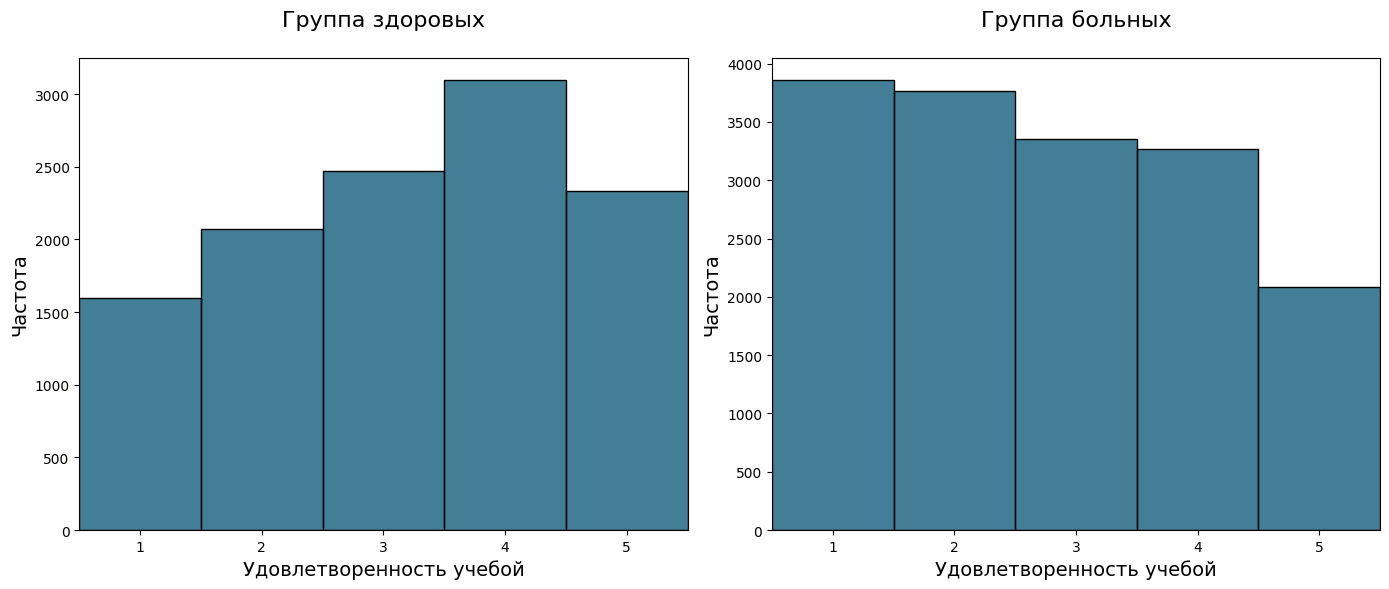

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

for subgroup, ax in zip([subgroup_1, subgroup_2], axes.flat):
  sns.histplot(subgroup, ax=ax, color='#025373', discrete=True,)
  ax.set_xlim(0.5, 5.5)
  ax.set_xlabel('Удовлетворенность учебой' , fontsize=14)
  ax.set_ylabel('Частота' , fontsize=14)

axes.flat[0].set_title('Группа здоровых', fontsize=16, pad=23)
axes.flat[1].set_title('Группа больных', fontsize=16, pad=23)

plt.tight_layout()
plt.show()

Проделаем то же самое для показателя академического давления и получим аналогичные выводы.

In [ ]:
#подвыборки из здоровых и боьных людей
subgroup_1 = df_filtered.academic_pressure[(df_filtered.depression == 0)&(df_filtered.academic_pressure != 0)]
subgroup_2 = df_filtered.academic_pressure[(df_filtered.depression == 1)&(df_filtered.academic_pressure != 0)]

statistic, p_value = mannwhitneyu(subgroup_1, subgroup_2)
print(f'p-value: {p_value:.3f}')
print(f'Значение статистики = {statistic:.1f}')

p-value: 0.000
Значение статистики = 43322743.5


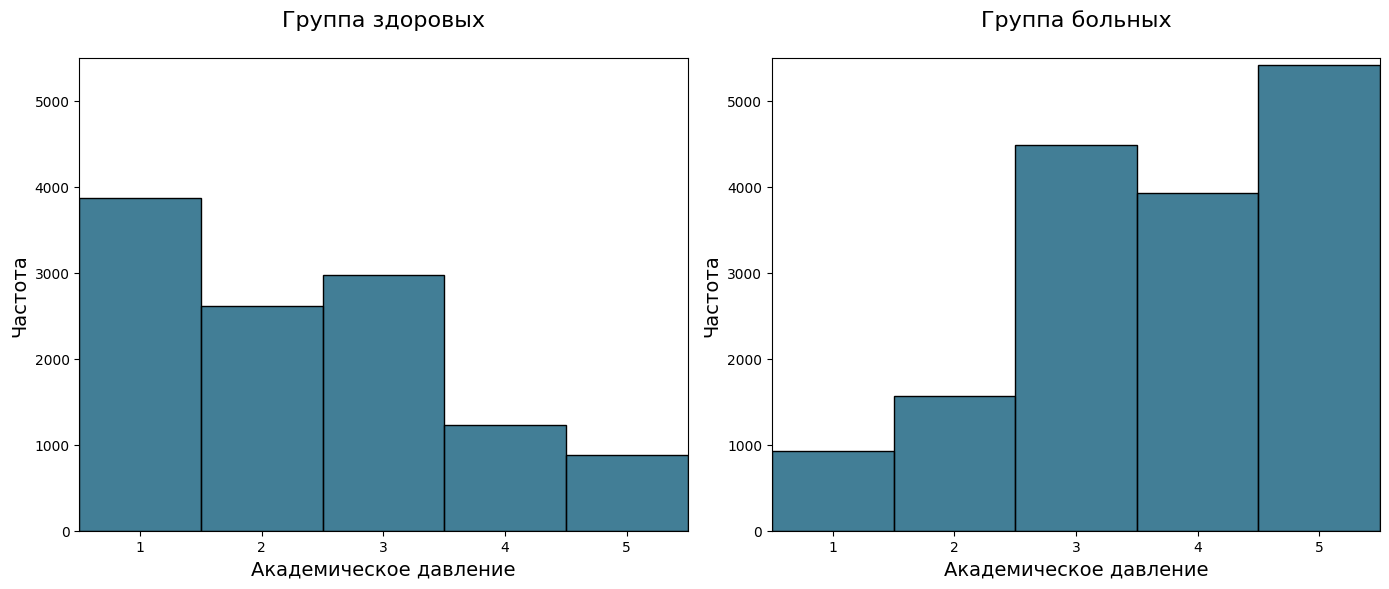

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

for subgroup, ax in zip([subgroup_1, subgroup_2], axes.flat):
  sns.histplot(subgroup, ax=ax, color='#025373', discrete=True,)
  ax.set_xlim(0.5, 5.5)
  ax.set_ylim(0, 5500)
  ax.set_xlabel('Академическое давление' , fontsize=14)
  ax.set_ylabel('Частота' , fontsize=14)

axes.flat[0].set_title('Группа здоровых', fontsize=16, pad=23)
axes.flat[1].set_title('Группа больных', fontsize=16, pad=23)


plt.tight_layout()
plt.show()

## Использование ML для установления наличия депрессии по второстепенным признакам

Попробуем решить задачу бинарной классификации для предсказания депрессии по различным признакам, взятым из датафрейма.

Отберем рассмотренные выше в тестах переменные и добавим к ним показатели баллов (cgpa) и пищевые привычки (dietary_habits).

In [ ]:
df_ml = df_filtered[['depression', 'suicidal_thoughts', 'family_history', 'academic_pressure', 'study_satisfaction', 'dietary_habits', 'cgpa']]

#фильтрация от малопредставленных категорий
df_ml = df_ml[(df_ml.dietary_habits != 'Others')&(df_ml.study_satisfaction != 0)&(df_ml.academic_pressure != 0)&(df_ml.cgpa > 0)]

'''
Используем One-Hot Encoding для бинарного представления переменной с тремя категориями
'''

df_ml = pd.concat([df_ml.drop(['dietary_habits'], axis=1), pd.get_dummies(df_ml['dietary_habits'], 'dietary_habits').astype('int')], axis=1)

df_ml.head()

,depression,suicidal_thoughts,family_history,academic_pressure,study_satisfaction,cgpa,dietary_habits_Healthy,dietary_habits_Moderate,dietary_habits_Unhealthy
0,1,1,0,5.0,2.0,8.97,1,0,0
1,0,0,1,2.0,5.0,5.90,0,1,0
2,0,0,1,3.0,5.0,7.03,1,0,0
3,1,1,1,3.0,2.0,5.59,0,1,0
4,0,1,0,4.0,3.0,8.13,0,1,0


In [ ]:
X = df_ml.drop(['depression', ], axis=1)
y = df_ml.depression

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=42)

Если не ограничивать максимальную глубину дерева, то модель очень сильно переобучается.

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)
pred = tree_model.predict(x_test)

train_accuracy = tree_model.score(X_train, y_train)
test_accuracy = tree_model.score(x_test, y_test)

print(f"Точность на обучающих данных: {train_accuracy:.4f}")
print(f"Точность на тестовых данных: {test_accuracy:.4f}")

Точность на обучающих данных: 0.9666
Точность на тестовых данных: 0.7325


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      4676
           1       0.77      0.77      0.77      6474

    accuracy                           0.73     11150
   macro avg       0.73      0.72      0.72     11150
weighted avg       0.73      0.73      0.73     11150



Посмотрим, какие признаки становятся более важными для такой модели.

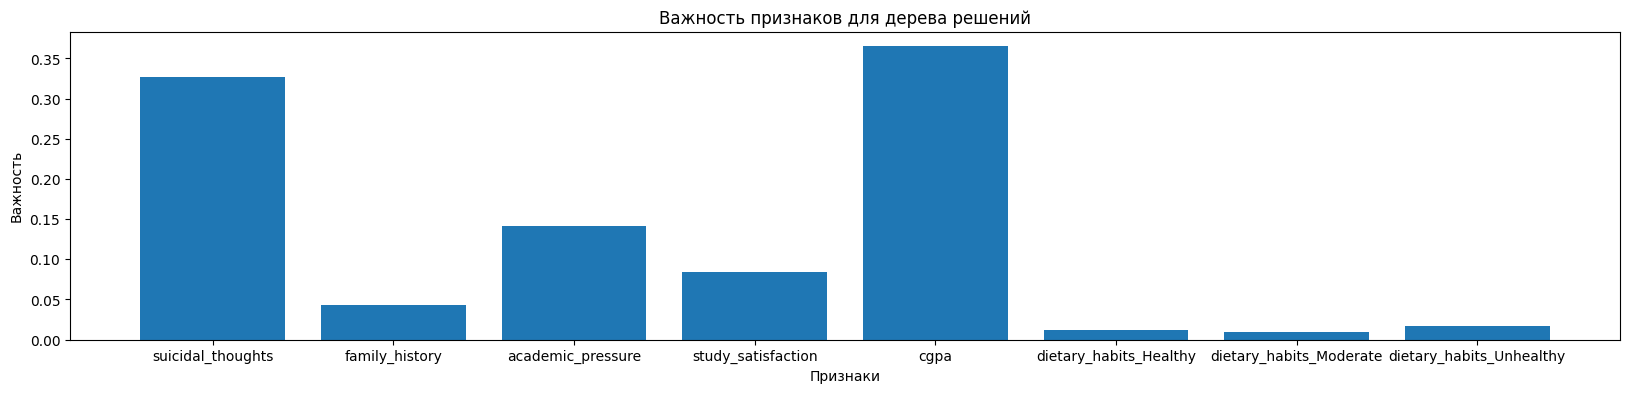

In [ ]:
feature_importances = tree_model.feature_importances_

plt.figure(figsize=(20 ,4))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков для дерева решений')
plt.xticks(range(len(feature_importances)), X.columns)
plt.show()

После ограничения глубины дерева разность в точностях на обучающих и тестовых данных стала не так велика.

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

tree_model.fit(X_train, y_train)
pred = tree_model.predict(x_test)

train_accuracy = tree_model.score(X_train, y_train)
test_accuracy = tree_model.score(x_test, y_test)

print(f"Точность на обучающих данных: {train_accuracy:.4f}")
print(f"Точность на тестовых данных: {test_accuracy:.4f}",'\n')

Точность на обучающих данных: 0.8157
Точность на тестовых данных: 0.8042 



In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.68      0.75      4676
           1       0.80      0.89      0.84      6474

    accuracy                           0.80     11150
   macro avg       0.81      0.79      0.79     11150
weighted avg       0.81      0.80      0.80     11150



Наиболее важными признаками стали наличие суицидальных мыслей и уровень академического давления. Это можно очень понятно продемонстрировать, если вспомнить ранеприведенные рассуждения.

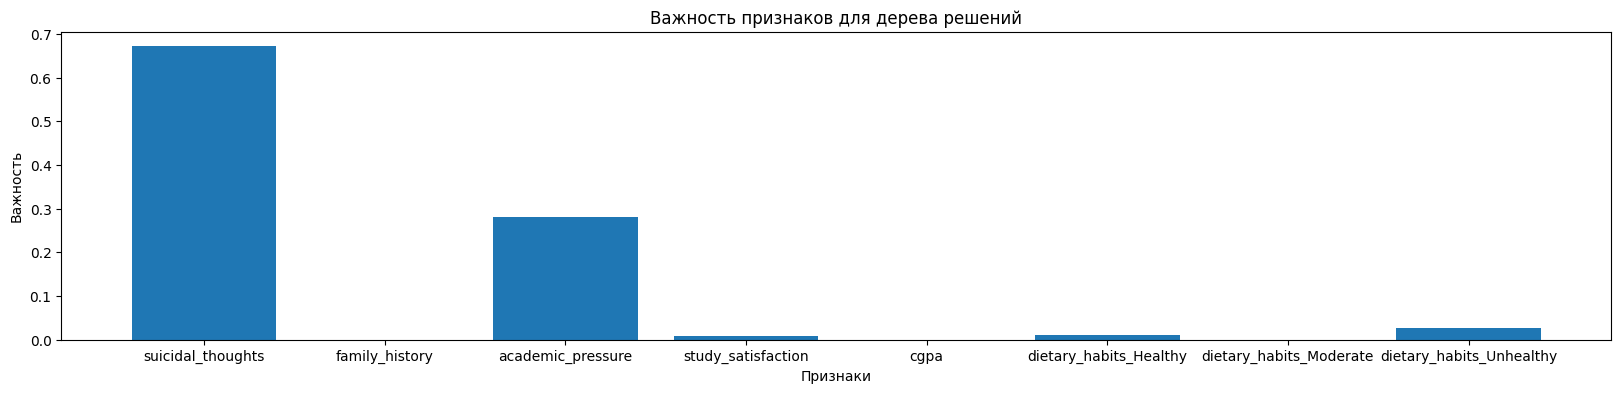

In [ ]:
feature_importances = tree_model.feature_importances_

plt.figure(figsize=(20 ,4))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков для дерева решений')
plt.xticks(range(len(feature_importances)), X.columns)
plt.show()

Таблица сопряженности для наличия суицидальных мыслей и депрессии выглядела следующим образом:

In [ ]:
depression_x_suicidal_thoughts

suicidal_thoughts,0,1
depression,,
0,7866,3699
1,2379,13957


In [ ]:
perc = (depression_x_suicidal_thoughts[0][0] + depression_x_suicidal_thoughts[1][1]) / depression_x_suicidal_thoughts.sum().sum()
print(f'{100*perc:.1f}%')

78.2%


Для 78.2% значений наличие/отсутствие суицидальных мыслей означает наличие/отсутствие депрессии. Это дает довольно однозначный критерий для разбиения.

Менее однозначное, но понятное, разбиение возникает для показателя уровня академического давления. Если он равен 1 или 2, то с большей вероятностью можно сказать, что у студента наблюдается депрессия. Если 4 или 5, то то с большей вероятностью можно заявить обратное.

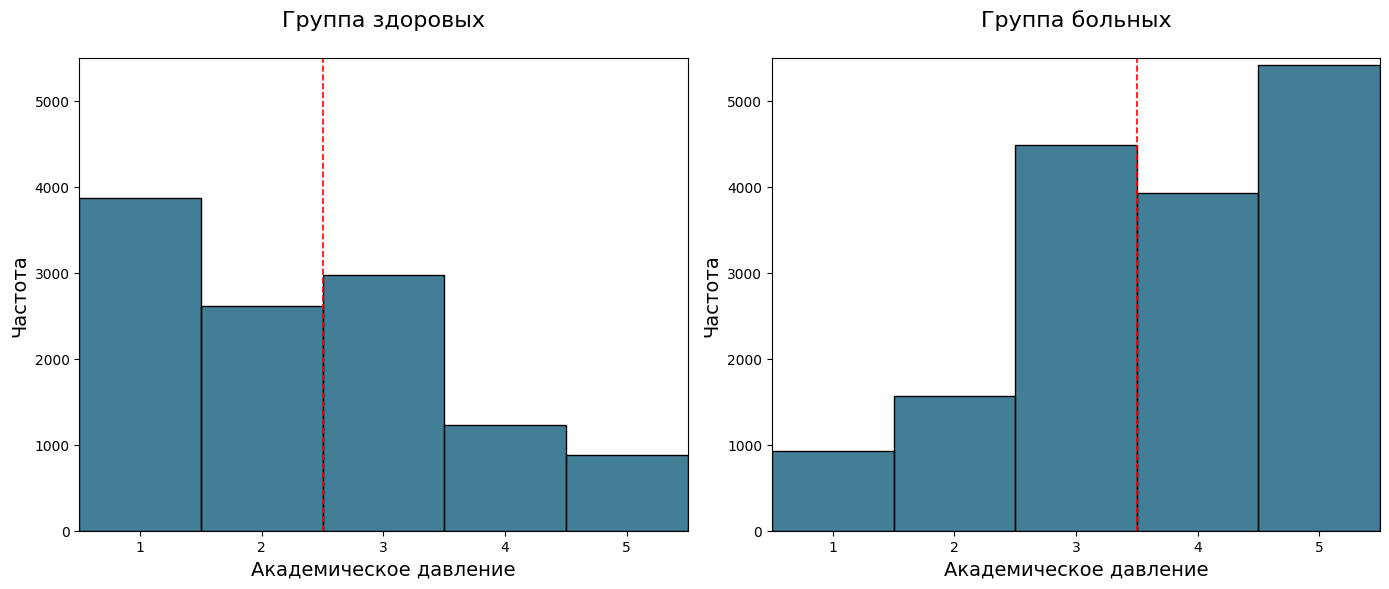

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

for subgroup, ax in zip([subgroup_1, subgroup_2], axes.flat):
  sns.histplot(subgroup, ax=ax, color='#025373', discrete=True,)
  ax.set_xlim(0.5, 5.5)
  ax.set_ylim(0, 5500)
  ax.set_xlabel('Академическое давление' , fontsize=14)
  ax.set_ylabel('Частота' , fontsize=14)

axes.flat[0].set_title('Группа здоровых', fontsize=16, pad=23)
axes.flat[1].set_title('Группа больных', fontsize=16, pad=23)

axes.flat[0].axvline(2.5,color='red', linestyle='--', linewidth=1.2)
axes.flat[1].axvline(3.5,color='red', linestyle='--', linewidth=1.2)

plt.tight_layout()
plt.show()

Таким образом можно проанализировать и остальные столбцы датафрейма, чтобы рассмотреть их на роль признаков для улучшения качества модели машинного обучения.